# yfinance

see also:

https://github.com/twopirllc/pandas-ta

https://github.com/ahnazary/stockdex#fundamental-data-from-yahoo-finance-api-fast-queries-through-yahoo-finance-api

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

[*********************100%***********************]  1 of 1 completed


Text(-0.05862455197132617, 1.0, 'TSLA stock price')

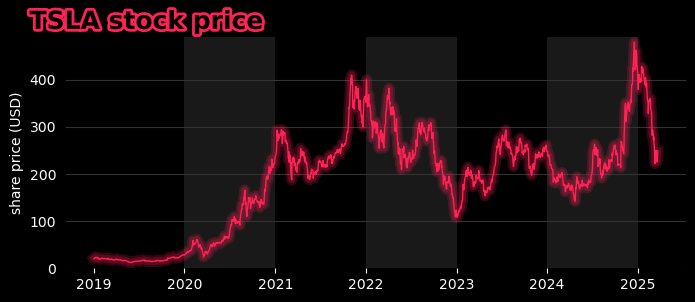

In [2]:
tsla = yf.download('TSLA', start="2019-01-01", end="2025-03-23", auto_adjust=True)

plt.style.use('dark_background')
fig=plt.figure(figsize=(8,3))
ax=fig.add_subplot(111)
plt.rcParams['axes.facecolor'] = '#151522'
plt.rcParams['figure.facecolor'] = '#151522'
#
plt.plot( tsla['Close'] , c='#FF2255', lw=1)
plt.plot( tsla['Close'] , c='#FF2255', lw=5, alpha=0.2)
plt.plot( tsla['Close'] , c='#FF2255', lw=8, alpha=0.2)
#
plt.ylim(0,490)
plt.ylabel('share price (USD)')
plt.grid(axis='y',color='#333333')
ax.yaxis.set_tick_params(width=0)
ax.spines[['right', 'top','left','bottom']].set_visible(False)

maxY = max(ax.get_ylim())
minY = min(ax.get_ylim())
for yyy in np.arange(2019,2026):
    # shaded for even years
    if yyy%2==0:
        plt.fill_between([np.datetime64(f'{yyy}-01-01') , np.datetime64(f'{yyy+1}-01-01')],
                         [minY,minY], [maxY,maxY], facecolor='w', alpha=0.1)

# Flush title left:
import matplotlib.patheffects as pe
bbox = ax.get_yticklabels()[-1].get_window_extent()
x,_ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
plt.title('TSLA stock price',
          ha='left',
          x=x,
          fontsize=18,
          color='k',
          fontweight='bold',
          path_effects=[pe.withStroke(linewidth=4, foreground="#FF2255")] )

[*********************100%***********************]  1 of 1 completed


Text(-0.05862455197132617, 1.0, 'TSLA stock price')

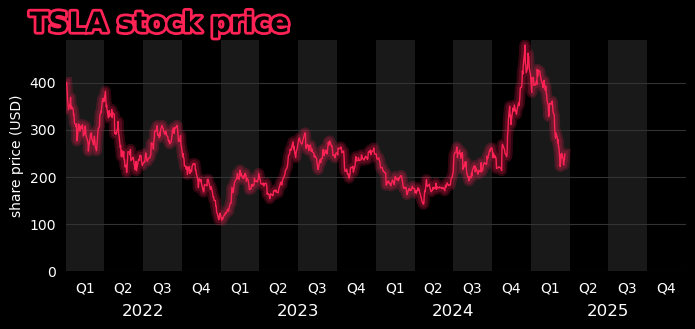

In [3]:
tsla = yf.download('TSLA', start="2022-01-01", end="2025-03-23", auto_adjust=True)

plt.style.use('dark_background')
fig=plt.figure(figsize=(8,3))
ax=fig.add_subplot(111)
plt.rcParams['axes.facecolor'] = '#151522'
plt.rcParams['figure.facecolor'] = '#151522'
#
plt.plot( tsla['Close'] , c='#FF2255', lw=1)
plt.plot( tsla['Close'] , c='#FF2255', lw=5, alpha=0.2)
plt.plot( tsla['Close'] , c='#FF2255', lw=8, alpha=0.2)
#
plt.ylim(0,490)
plt.grid(axis='y',color='#333333')
ax.yaxis.set_tick_params(width=0)
ax.spines[['right', 'top','left','bottom']].set_visible(False)
plt.ylabel('share price (USD)')

import numpy as np
Qlabelticks = []
Qlabelabels = []
yearsToLabel = np.arange(2022,2026,1)
maxY = max(ax.get_ylim())
minY = min(ax.get_ylim())

for yyy in yearsToLabel:
    Qlabelticks += [np.datetime64(f'{yyy}-02-15'),np.datetime64(f'{yyy}-05-15'),np.datetime64(f'{yyy}-08-15'),np.datetime64(f'{yyy}-11-15')] 
    Qlabelabels += ['Q1','Q2','Q3','Q4']
    # shaded for odd quarters:
    plt.fill_between([np.datetime64(f'{yyy}-01-01') , np.datetime64(f'{yyy}-04-01')],
                         [minY,minY], [maxY,maxY], facecolor='w', alpha=0.10)
    plt.fill_between([np.datetime64(f'{yyy}-07-01') , np.datetime64(f'{yyy}-10-01')],
                         [minY,minY], [maxY,maxY], facecolor='w', alpha=0.10)    


plt.xticks( Qlabelticks , Qlabelabels )
ax.xaxis.set_tick_params(width=0)

# Write year:
sec = ax.secondary_xaxis(location=-0.1)
sec.set_xticks([np.datetime64(f'{yyy}-07-01') for yyy in yearsToLabel],
              [f'{yyy}' for yyy in yearsToLabel])
sec.tick_params(width=0,labelsize = 12)
sec.spines[['bottom']].set_visible(False)

if False:
    # Separation between years:
    sec2 = ax.secondary_xaxis(location=-0.05)
    sec2.set_xticks([np.datetime64(f'{yyy}-01-01') for yyy in yearsToLabel],
                  ['' for yyy in yearsToLabel])
    sec2.tick_params(length=25)
    sec2.spines[['bottom']].set_visible(False)

plt.xlim( np.datetime64(f'{min(yearsToLabel)}-01-01') , np.datetime64(f'{max(yearsToLabel)}-12-31') )

# Flush title left:
import matplotlib.patheffects as pe
bbox = ax.get_yticklabels()[-1].get_window_extent()
x,_ = ax.transAxes.inverted().transform([bbox.x0, bbox.y0])
plt.title('TSLA stock price',
          ha='left',
          x=x,
          fontsize=20,
          color='k',
          fontweight='bold',
          path_effects=[pe.withStroke(linewidth=4, foreground="#FF2255")] )

[*********************100%***********************]  5 of 5 completed

CPU times: user 147 ms, sys: 17.9 ms, total: 165 ms
Wall time: 200 ms



<timed exec>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


<Axes: xlabel='Date'>

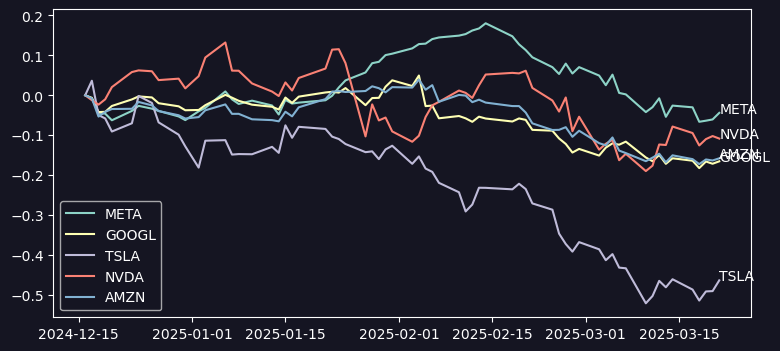

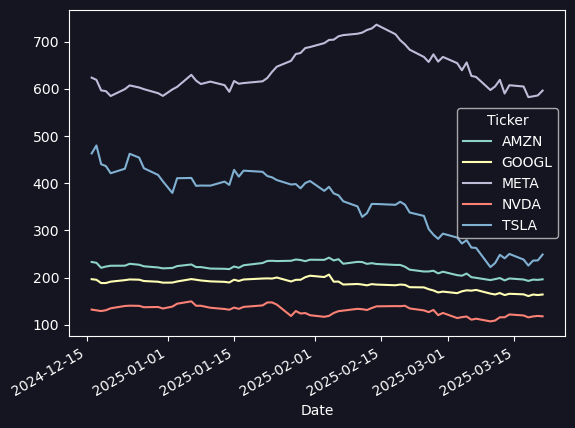

In [4]:
%%time
import yfinance as yf
import matplotlib.pyplot as plt


companies = ['META','GOOGL','TSLA','NVDA','AMZN']
multi_data = yf.download(companies, start="2024-12-15", end="2025-03-23", auto_adjust=True)

plt.figure(figsize=(9,4))
for ccc in companies:
    close = multi_data['Close'][ccc]
    relative = (close-close.iloc[0]) / close.iloc[0]
    plt.plot( relative , label=ccc )
    plt.text( multi_data.index[-1], relative[-1] , ccc )
plt.legend()

multi_data['Close'].plot()